##Importando Bibliotecas e Dados

In [ ]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Definir as ações
ticker1 = "GRND3.SA"
dolar = "USDBRL=X"

# Definir as datas inicial e final
data_inicial = "2017-01-01"
data_final = "2022-12-31"

# Baixar os dados históricos
dados_grnd = yf.download(ticker1, data_inicial, data_final)
cotacao_dolar = yf.download(dolar, data_inicial, data_final)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
dados_grnd

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,5.860000,5.976666,5.820000,5.870000,3.818628,371400
2017-01-03,5.936666,6.016666,5.906666,6.016666,3.914039,699000
2017-01-04,6.023333,6.136666,6.000000,6.113333,3.976925,1278600
2017-01-05,6.053333,6.063333,5.950000,5.970000,3.883682,978300
2017-01-06,5.966666,5.983333,5.916666,5.933333,3.859827,678000
...,...,...,...,...,...,...
2022-12-23,6.530000,6.730000,6.530000,6.730000,5.743227,944600
2022-12-26,6.730000,6.770000,6.570000,6.590000,5.623755,752300
2022-12-27,6.600000,6.600000,6.250000,6.270000,5.350674,1238900


##Preparação dos Dados

In [ ]:
# Criar a nova coluna Movimento 7 dias
dados_grnd["Movimento_7"] = dados_grnd["Close"].rolling(window=7).mean() > dados_grnd["Close"].shift(7)

In [ ]:
# Converter os valores True e False para 0 e 1
dados_grnd["Movimento_7"] = (dados_grnd["Movimento_7"] == True).astype(int)

In [ ]:
dados = pd.merge(dados_grnd, cotacao_dolar, on="Date")

In [ ]:
dados

,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,Movimento_7,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y
Date,,,,,,,,,,,,,
2017-01-02,5.860000,5.976666,5.820000,5.870000,3.818628,371400,0,3.2532,3.279700,3.242700,3.2532,3.2532,0
2017-01-03,5.936666,6.016666,5.906666,6.016666,3.914039,699000,0,3.2841,3.289700,3.247500,3.2840,3.2840,0
2017-01-04,6.023333,6.136666,6.000000,6.113333,3.976925,1278600,0,3.2635,3.264300,3.218800,3.2635,3.2635,0
2017-01-05,6.053333,6.063333,5.950000,5.970000,3.883682,978300,0,3.2149,3.227600,3.199800,3.2141,3.2141,0
2017-01-06,5.966666,5.983333,5.916666,5.933333,3.859827,678000,0,3.1975,3.211800,3.189400,3.1977,3.1977,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,6.530000,6.730000,6.530000,6.730000,5.743227,944600,1,5.1656,5.175000,5.116316,5.1656,5.1656,0
2022-12-26,6.730000,6.770000,6.570000,6.590000,5.623755,752300,1,5.1643,5.204200,5.162500,5.1643,5.1643,0
2022-12-27,6.600000,6.600000,6.250000,6.270000,5.350674,1238900,1,5.2175,5.291600,5.124977,5.2175,5.2175,0


In [ ]:
dados.drop(columns=['Open_x', 'High_x', 'Low_x', 'Adj Close_x', 'Volume_x', 'Open_y', 'High_y', 'Low_y', 'Adj Close_y', 'Volume_y'], axis=1, inplace=True)
dados

,Close_x,Movimento_7,Close_y
Date,,,
2017-01-02,5.870000,0,3.2532
2017-01-03,6.016666,0,3.2840
2017-01-04,6.113333,0,3.2635
2017-01-05,5.970000,0,3.2141
2017-01-06,5.933333,0,3.1977
...,...,...,...
2022-12-23,6.730000,1,5.1656
2022-12-26,6.590000,1,5.1643
2022-12-27,6.270000,1,5.2175


In [ ]:
# Criar a coluna fechamento
dados["fechamento"] = pd.to_numeric(dados["Close_x"])

# Separar as colunas de entrada e saída
x = dados[["Close_x", "Movimento_7"]]
y = dados["fechamento"]

# Normalizar os dados
x = (x - x.mean()) / x.std()

##Montando o modelo de Árvore de Decisão

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

In [ ]:
# Dividir os dados em conjunto de treinamento e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, shuffle=False)

In [ ]:
modelo = DecisionTreeRegressor(max_depth=15, max_features="sqrt", min_samples_leaf=5, min_samples_split=20)

In [ ]:
modelo.fit(x_treino, y_treino)

In [ ]:
# Avaliar o modelo no conjunto de teste
erro_treino = np.mean(modelo.predict(x_treino) - y_treino)
erro_teste = np.mean(modelo.predict(x_teste) - y_teste)

# Imprimir o erro do modelo
print("Erro de treinamento:", erro_treino)
print("Erro de teste:", erro_teste)

# Realizar validação cruzada
scores = cross_val_score(modelo, x, y, cv=10)
print("Acurácia:", np.mean(scores))

Erro de treinamento: 2.3098599841194533e-17
Erro de teste: -0.0016503178369420472
Acurácia: 0.9972164629679149


In [ ]:
predicoes = modelo.predict(x_teste)

rmse = np.sqrt(mean_squared_error(y_teste, predicoes))
mae = mean_absolute_error(y_teste, predicoes)
mse = mean_squared_error(y_teste, predicoes)
r2 = r2_score(y_teste, predicoes)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R^2:", r2)

MSE: 0.0009496272528780912
MAE: 0.019913825757420976
RMSE: 0.030816022664810122
R^2: 0.9991410011454506


In [ ]:
predicoes = modelo.predict(x_teste)

# Comparar os dados reais e as previsões
df = pd.DataFrame({
    "real": y_teste,
    "previsao": predicoes
})

print(df.head(15))

            real  previsao
Date                      
2021-10-21  8.84  8.857451
2021-10-22  8.71  8.692889
2021-10-25  9.18  9.162222
2021-10-26  8.86  8.857451
2021-10-27  8.90  8.897333
2021-10-28  8.68  8.692889
2021-10-29  8.58  8.574167
2021-11-01  8.90  8.897333
2021-11-03  9.33  9.321778
2021-11-04  9.25  9.213137
2021-11-05  9.30  9.321778
2021-11-08  8.89  8.897333
2021-11-09  9.20  9.213137
2021-11-10  9.42  9.405128
2021-11-11  9.30  9.321778


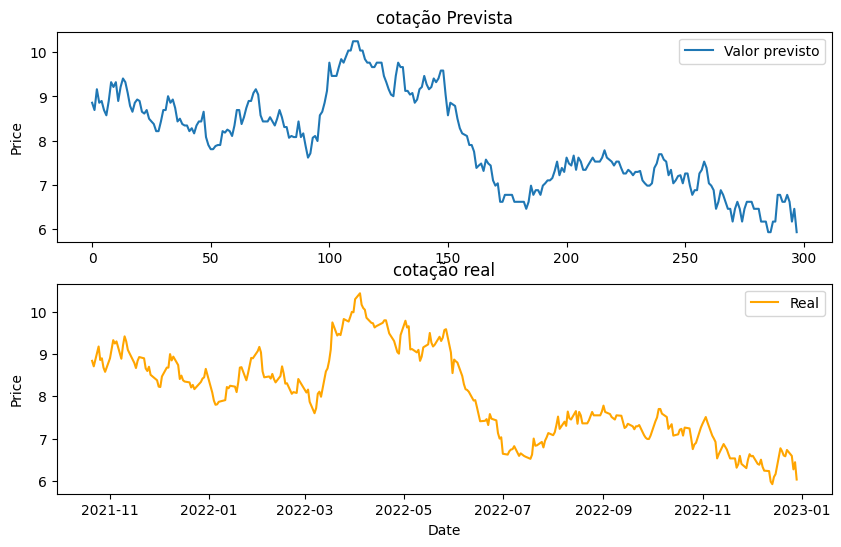

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10, 6))

# Plot dos dados
ax[1].plot(dados_grnd_final, label= 'Real', color='orange')
ax[1].set_title('cotação real')
ax[1].set_ylabel('Price')
ax[1].set_xlabel('Date')
ax[1].legend()

ax[0].plot(predicoes, label="Valor previsto")
ax[0].set_title('cotação Prevista')
ax[0].set_ylabel('Price')
ax[0].legend()
plt.show()